<a href="https://colab.research.google.com/github/Mohor35/CSE22005_ml/blob/main/CSE22005_lab3_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lab - 3

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Thyroid.xlsx to Thyroid.xlsx


Question A1


In [20]:
import pandas as pd
import numpy as np
file_path = 'Thyroid.xlsx'
df = pd.read_excel(file_path)



numeric_columns = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']
df_cleaned = df.copy()

for col in numeric_columns:
    df_cleaned[col] = pd.to_numeric(df_cleaned[col].replace('?', None), errors='coerce')

df_cleaned = df_cleaned.dropna(subset=numeric_columns)


print("Unique classes:", df_cleaned['Condition'].unique())


class_1 = 'NO CONDITION'
class_2 = 'AK'


class_1_data = df_cleaned[df_cleaned['Condition'] == class_1][numeric_columns]
class_2_data = df_cleaned[df_cleaned['Condition'] == class_2][numeric_columns]
centroid_1 = np.mean(class_1_data, axis=0)
centroid_2 = np.mean(class_2_data, axis=0)
spread_1 = np.std(class_1_data, axis=0)
spread_2 = np.std(class_2_data, axis=0)
distance = np.linalg.norm(centroid_1 - centroid_2)
print("Class 1 Centroid (NO CONDITION):\n", centroid_1)
print("Class 2 Centroid (AK):\n", centroid_2)
print("\nIntraclass Spread for NO CONDITION:\n", spread_1)
print("Intraclass Spread for AK:\n", spread_2)
print("\nEuclidean Distance between the Centroids:", distance)


Unique classes: ['NO CONDITION' 'AK' 'R' 'M' 'N' 'G' 'F' 'K' 'I' 'KJ' 'L' 'MK' 'A' 'Q' 'J'
 'C|I' 'O' 'H|K' 'D' 'GK' 'MI' 'P' 'FK' 'B' 'GI' 'C' 'GKJ' 'OI']
Class 1 Centroid (NO CONDITION):
 age     83.536778
TSH      1.622806
T3       1.980035
TT4    106.239060
T4U      0.972806
FTI    110.246858
dtype: float64
Class 2 Centroid (AK):
 age     56.954545
TSH      0.101591
T3       1.920455
TT4    178.136364
T4U      0.899091
FTI    199.181818
dtype: float64

Intraclass Spread for NO CONDITION:
 age    1412.174713
TSH       2.418676
T3        0.549142
TT4      24.624676
T4U       0.161153
FTI      23.201336
dtype: float64
Intraclass Spread for AK:
 age    19.171421
TSH     0.084139
T3      0.429365
TT4    21.060077
T4U     0.094840
FTI    21.956851
dtype: float64

Euclidean Distance between the Centroids: 117.42055927633473


Question A2

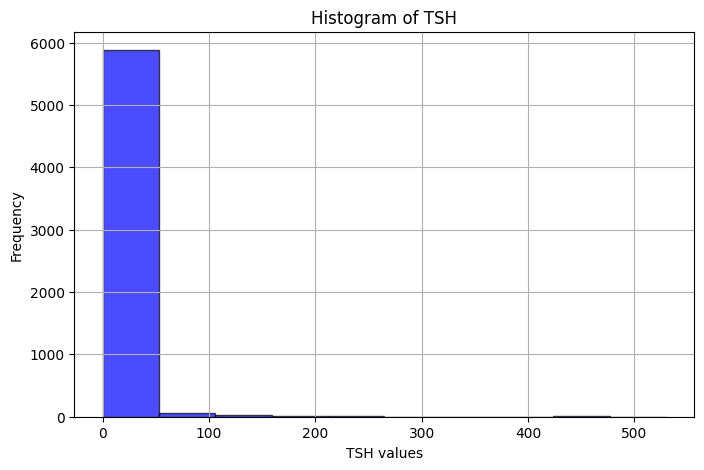

Mean of TSH: 5.202644544284759
Variance of TSH: 619.7010220169136


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


file_path = 'Thyroid.xlsx'
df = pd.read_excel(file_path)


numeric_columns = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']


for col in numeric_columns:
    df[col] = pd.to_numeric(df[col].replace('?', None), errors='coerce')
df_cleaned = df.dropna(subset=numeric_columns)
feature = 'TSH'
data = df_cleaned[feature]

plt.figure(figsize=(8, 5))
plt.hist(data, bins=10, color='blue', alpha=0.7, edgecolor='black')
plt.title(f'Histogram of {feature}')
plt.xlabel(f'{feature} values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


mean_value = np.mean(data)
variance_value = np.var(data)

print(f'Mean of {feature}: {mean_value}')
print(f'Variance of {feature}: {variance_value}')


Question A3

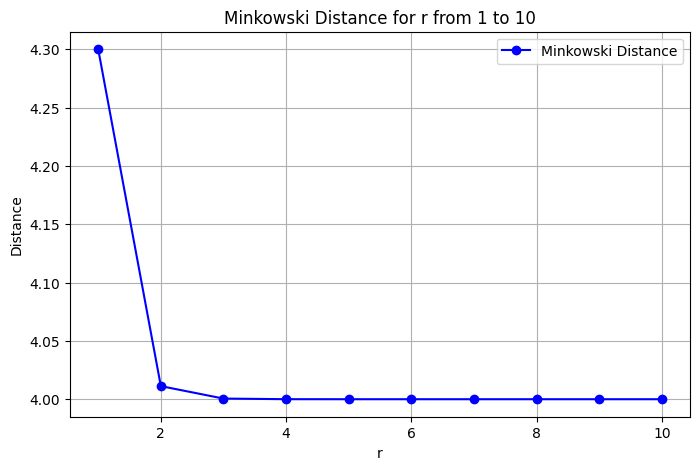

Minkowski Distance with r=1: 4.3
Minkowski Distance with r=2: 4.011234224026316
Minkowski Distance with r=3: 4.000562420916971
Minkowski Distance with r=4: 4.000031640249584
Minkowski Distance with r=5: 4.000001898435698
Minkowski Distance with r=6: 4.000000118652335
Minkowski Distance with r=7: 4.0000000076276505
Minkowski Distance with r=8: 4.000000000500565
Minkowski Distance with r=9: 4.000000000033371
Minkowski Distance with r=10: 4.000000000002252


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import minkowski

file_path = 'Thyroid.xlsx'
df = pd.read_excel(file_path)


numeric_columns = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col].replace('?', None), errors='coerce')

df_cleaned = df.dropna(subset=numeric_columns)


feature_1 = df_cleaned[['age', 'TSH']].iloc[0].values
feature_2 = df_cleaned[['age', 'TSH']].iloc[1].values

distances = []


r_values = list(range(1, 11))
for r in r_values:
    distance = minkowski(feature_1, feature_2, p=r)
    distances.append(distance)


plt.figure(figsize=(8, 5))
plt.plot(r_values, distances, marker='o', color='b', linestyle='-', label='Minkowski Distance')
plt.title('Minkowski Distance for r from 1 to 10')
plt.xlabel('r')
plt.ylabel('Distance')
plt.grid(True)
plt.legend()
plt.show()

for r, dist in zip(r_values, distances):
    print(f'Minkowski Distance with r={r}: {dist}')


Question A4

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

file_path = 'Thyroid.xlsx'
df = pd.read_excel(file_path)


print("Column names:", df.columns)

numeric_columns = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']


for col in numeric_columns:
    df[col] = pd.to_numeric(df[col].replace('?', None), errors='coerce')

df_cleaned = df.dropna(subset=numeric_columns)


print(df_cleaned.head())


target_column = 'Condition'


if target_column not in df_cleaned.columns:
    raise KeyError(f"Target column '{target_column}' not found in DataFrame")

X = df_cleaned[numeric_columns]
y = df_cleaned[target_column]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


print(f'Training set size: {X_train.shape[0]}')
print(f'Test set size: {X_test.shape[0]}')


Column names: Index(['Record ID', 'age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'TBG measured', 'TBG', 'referral source',
       'Condition'],
      dtype='object')
    Record ID  age sex on thyroxine query on thyroxine  \
19  840815068   36   F            f                  f   
21  840816001   40   F            f                  f   
22  840816002   40   F            f                  f   
23  840816003   77   F            f                  f   
27  840816007   51   F            f                  f   

   on antithyroid medication sick pregnant thyroid surgery I131 treatment  \
19                         f    f        f               f            

Question A5

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


file_path = 'Thyroid.xlsx'
df = pd.read_excel(file_path)


numeric_columns = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']


for col in numeric_columns:
    df[col] = pd.to_numeric(df[col].replace('?', None), errors='coerce')

df_cleaned = df.dropna(subset=numeric_columns)


target_column = 'Condition'

X = df_cleaned[numeric_columns]
y = df_cleaned[target_column]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

y_pred = neigh.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)


Accuracy: 0.75
Confusion Matrix:
[[  16    2    0    0    0    1    0    0    0    0    0    0    0    0
     0    0    0    1    0    0    0    3    0    0    0    0    1]
 [   5    6    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    2    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0   10    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    1    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    2
     0    0    0    0    0    0    0    0    3    0    0    0    0]
 [   5    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0   47    0    2    0    0    0    0    0
     0    1    0    0    0    0    0    0    0    0    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

Question A6

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


file_path = 'Thyroid.xlsx'
df = pd.read_excel(file_path)


numeric_columns = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']


for col in numeric_columns:
    df[col] = pd.to_numeric(df[col].replace('?', None), errors='coerce')

df_cleaned = df.dropna(subset=numeric_columns)

target_column = 'Condition'

X = df_cleaned[numeric_columns]
y = df_cleaned[target_column]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)


accuracy = neigh.score(X_test, y_test)


print(f'Accuracy of kNN classifier on the test set: {accuracy:.2f}')


Accuracy of kNN classifier on the test set: 0.75


Question A7

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

file_path = 'Thyroid.xlsx'
df = pd.read_excel(file_path)


numeric_columns = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']


for col in numeric_columns:
    df[col] = pd.to_numeric(df[col].replace('?', None), errors='coerce')

df_cleaned = df.dropna(subset=numeric_columns)


target_column = 'Condition'

X = df_cleaned[numeric_columns]
y = df_cleaned[target_column]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)


y_pred = neigh.predict(X_test)
print("Predictions for all test vectors:")
print(y_pred)


test_vect = X_test.iloc[0].values.reshape(1, -1)
predicted_class = neigh.predict(test_vect)
print(f"\nPredicted class for the test vector {test_vect.flatten()}: {predicted_class[0]}")


Predictions for all test vectors:
['NO CONDITION' 'NO CONDITION' 'NO CONDITION' ... 'NO CONDITION'
 'NO CONDITION' 'NO CONDITION']

Predicted class for the test vector [ 27.     5.1    2.3  121.     1.21 101.  ]: NO CONDITION


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Question A8

k = 1, Accuracy = 0.72
k = 2, Accuracy = 0.68
k = 3, Accuracy = 0.75
k = 4, Accuracy = 0.75
k = 5, Accuracy = 0.77
k = 6, Accuracy = 0.76
k = 7, Accuracy = 0.77
k = 8, Accuracy = 0.77
k = 9, Accuracy = 0.77
k = 10, Accuracy = 0.77
k = 11, Accuracy = 0.77


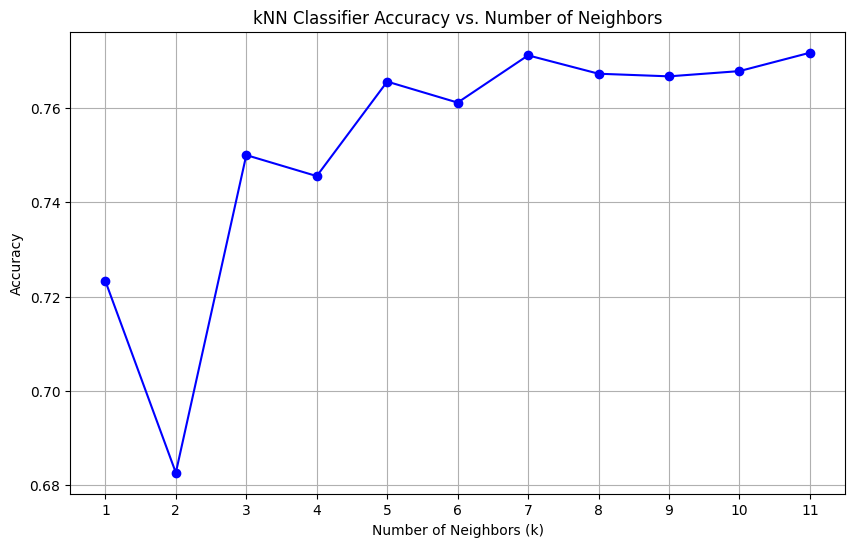

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


file_path = 'Thyroid.xlsx'
df = pd.read_excel(file_path)

numeric_columns = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']


for col in numeric_columns:
    df[col] = pd.to_numeric(df[col].replace('?', None), errors='coerce')

df_cleaned = df.dropna(subset=numeric_columns)


target_column = 'Condition'

X = df_cleaned[numeric_columns]
y = df_cleaned[target_column]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


k_values = range(1, 12)
accuracies = []


for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f'k = {k}, Accuracy = {accuracy:.2f}')

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('kNN Classifier Accuracy vs. Number of Neighbors')
plt.xticks(k_values)
plt.grid(True)
plt.show()


Question A9

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

Confusion Matrix for Training Set:
[[  65    3    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    1    0    0    0    1    0    0    0    0    0    0]
 [  13   16    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    2    0    0    0    0    0    0]
 [   0    0    1    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    7    0    0    0    0    0]
 [   0    0    0    1    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    4    0    0    0    0    0]
 [   0    0    0    0    2    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    4    0    0    0    0    0]
 [   2    0    0    0    0    1    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0  112    0    2    0    0    0    1    0
     0    1    0    0  

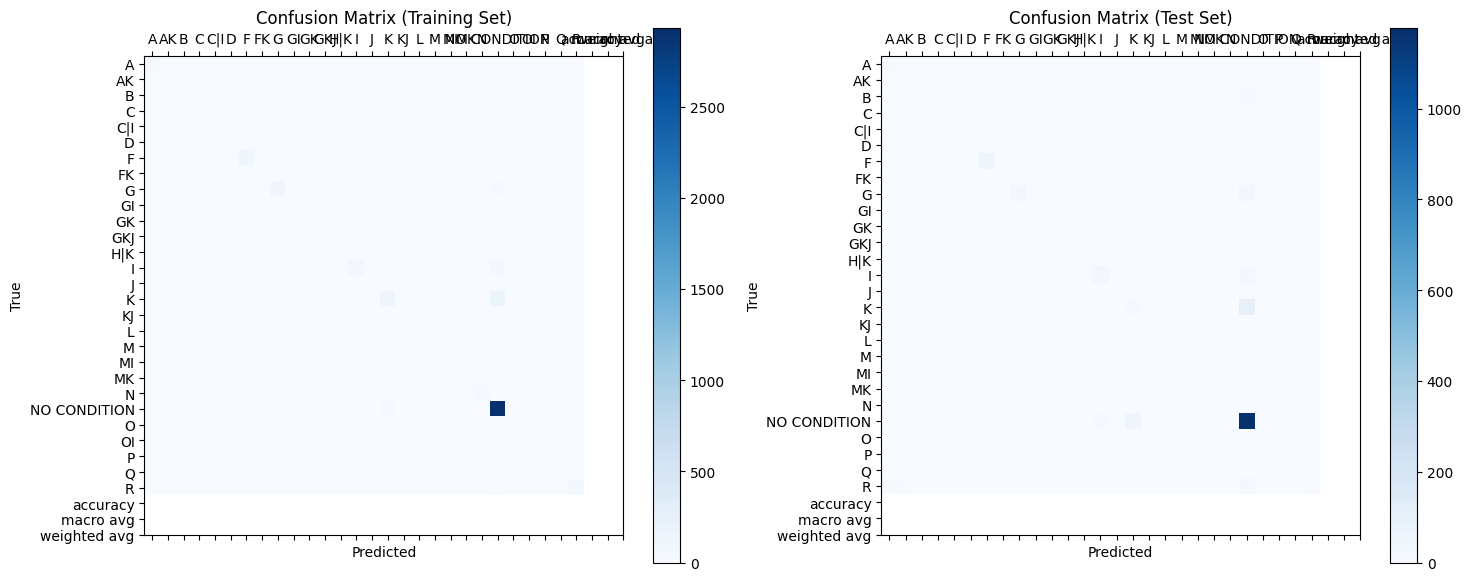

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


file_path = 'Thyroid.xlsx'
df = pd.read_excel(file_path)


numeric_columns = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']


for col in numeric_columns:
    df[col] = pd.to_numeric(df[col].replace('?', None), errors='coerce')

df_cleaned = df.dropna(subset=numeric_columns)


target_column = 'Condition'

X = df_cleaned[numeric_columns]
y = df_cleaned[target_column]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


k = 3
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)


y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

conf_matrix_train = confusion_matrix(y_train, y_train_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)


class_report_train = classification_report(y_train, y_train_pred, output_dict=True)
class_report_test = classification_report(y_test, y_test_pred, output_dict=True)


print("Confusion Matrix for Training Set:")
print(conf_matrix_train)
print("\nConfusion Matrix for Test Set:")
print(conf_matrix_test)


print("\nClassification Report for Training Set:")
print(class_report_train)
print("\nClassification Report for Test Set:")
print(class_report_test)


fig, axs = plt.subplots(1, 2, figsize=(15, 6))


cax1 = axs[0].matshow(conf_matrix_train, cmap='Blues')
fig.colorbar(cax1, ax=axs[0])
axs[0].set_title('Confusion Matrix (Training Set)')
axs[0].set_xlabel('Predicted')
axs[0].set_ylabel('True')
axs[0].set_xticks(np.arange(len(class_report_train)))
axs[0].set_yticks(np.arange(len(class_report_train)))
axs[0].set_xticklabels(class_report_train.keys())
axs[0].set_yticklabels(class_report_train.keys())


cax2 = axs[1].matshow(conf_matrix_test, cmap='Blues')
fig.colorbar(cax2, ax=axs[1])
axs[1].set_title('Confusion Matrix (Test Set)')
axs[1].set_xlabel('Predicted')
axs[1].set_ylabel('True')
axs[1].set_xticks(np.arange(len(class_report_test)))
axs[1].set_yticks(np.arange(len(class_report_test)))
axs[1].set_xticklabels(class_report_test.keys())
axs[1].set_yticklabels(class_report_test.keys())

plt.tight_layout()
plt.show()
